In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import (
    load_breast_cancer,
    load_iris,
    load_wine,
    fetch_california_housing,
    load_diabetes,
)
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import numpy as np

import graphviz
import matplotlib.pyplot as plt

In [4]:
cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target, test_size=0.3, random_state=123
)

dmtrain = xgb.DMatrix(data=X_train, label=y_train)
dmtest = xgb.DMatrix(data=X_test, label=y_test)

params = {
    "max_depth": 3,
    "eta": 0.15,
    "objective": "binary:logistic",
    "eval_metric": "error",
}
num_rounds = 500
evals = [(dmtrain, "train"), (dmtest, "test")]
xgb_model = xgb.train(
    params=params,
    dtrain=dmtrain,
    num_boost_round=num_rounds,
    early_stopping_rounds=20,
    evals=evals,
)

[0]	train-error:0.36181	test-error:0.39766
[1]	train-error:0.06784	test-error:0.08187
[2]	train-error:0.02513	test-error:0.04678
[3]	train-error:0.01508	test-error:0.04678
[4]	train-error:0.01759	test-error:0.04678
[5]	train-error:0.01759	test-error:0.04094
[6]	train-error:0.01759	test-error:0.04094
[7]	train-error:0.01005	test-error:0.04094
[8]	train-error:0.01005	test-error:0.04094
[9]	train-error:0.01508	test-error:0.04094
[10]	train-error:0.01005	test-error:0.04094
[11]	train-error:0.00754	test-error:0.03509
[12]	train-error:0.00754	test-error:0.04094
[13]	train-error:0.00754	test-error:0.03509
[14]	train-error:0.00754	test-error:0.02339
[15]	train-error:0.00754	test-error:0.02339
[16]	train-error:0.00754	test-error:0.02339
[17]	train-error:0.00754	test-error:0.02924
[18]	train-error:0.00754	test-error:0.02339
[19]	train-error:0.00754	test-error:0.02924
[20]	train-error:0.00754	test-error:0.02924
[21]	train-error:0.00754	test-error:0.02339
[22]	train-error:0.00754	test-error:0.0233

In [5]:
predict_probability = xgb_model.predict(dmtest)
print(np.round(predict_probability[:10], 3))

predict_integer = [1 if p > 0.5 else 0 for p in predict_probability]
print(predict_integer[:10])

print(f"Accuracy : {accuracy_score(y_test, predict_integer)}")
print(f"precision {precision_score(y_test, predict_integer)}")
print(f"Racall {recall_score(y_test, predict_integer)}")

[0.996 0.994 0.012 0.981 0.007 0.896 0.963 0.987 0.798 0.893]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
Accuracy : 0.9766081871345029
precision 0.9805825242718447
Racall 0.9805825242718447


In [6]:
import pandas as pd

features = cancer_data.data
label = cancer_data.target

cancer_df = pd.DataFrame(data=features, columns=cancer_data.feature_names)
cancer_df["target"] = label
cancer_df.head()

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

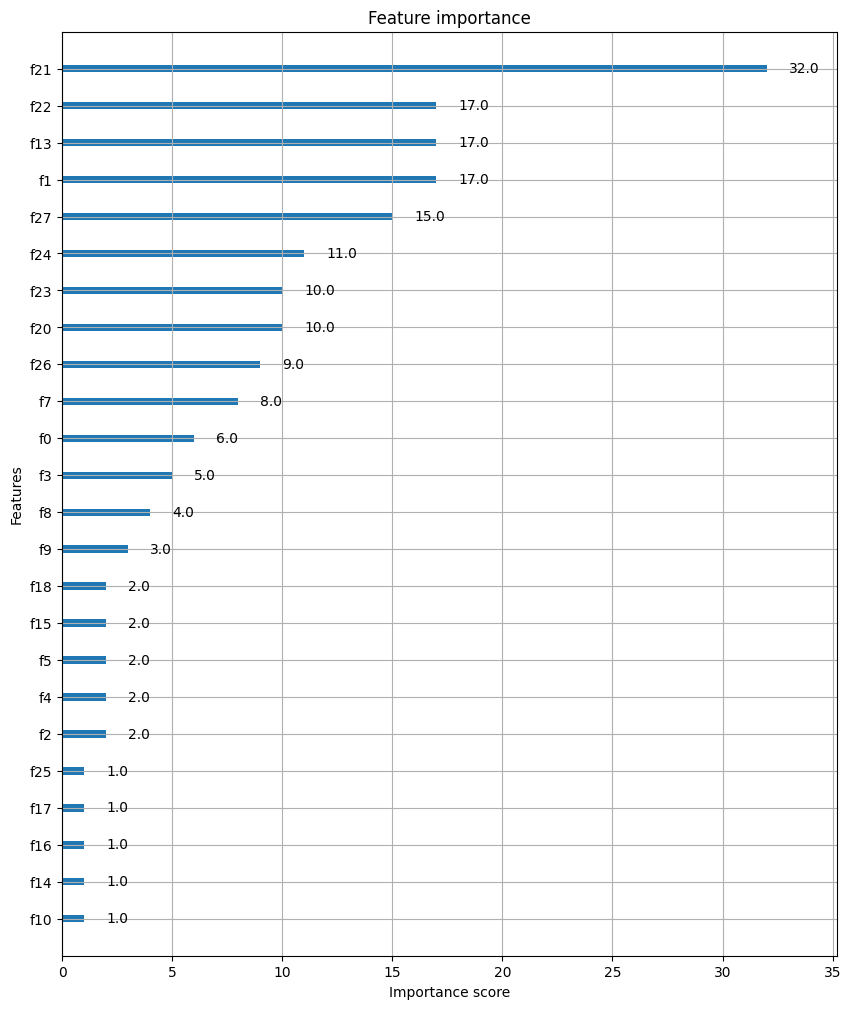

In [7]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

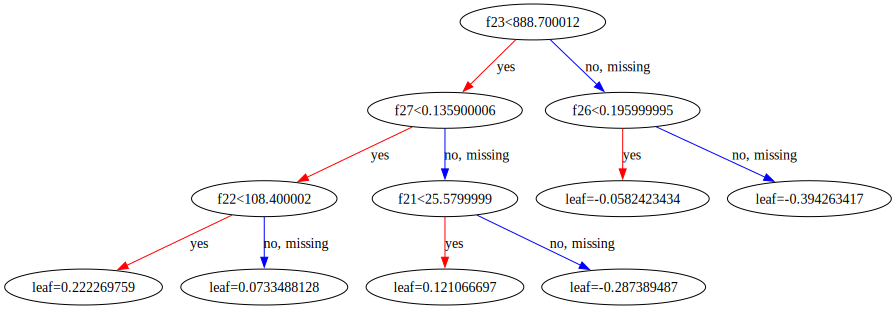

In [8]:
xgb.to_graphviz(xgb_model)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


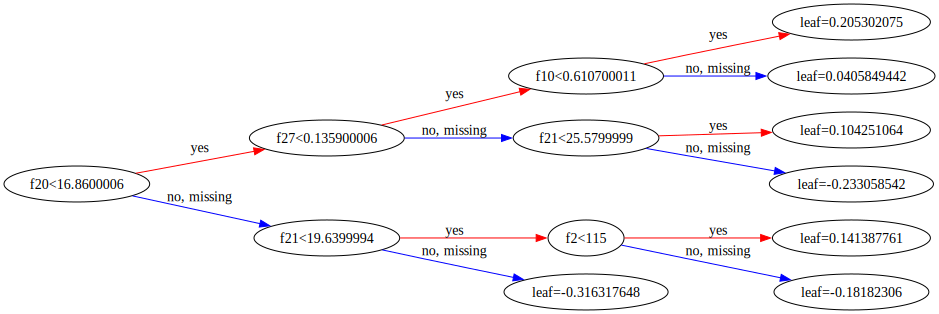

In [9]:
# 1번 트리를 확인하는 코드
xgb.to_graphviz(xgb_model, num_trees=1, rankdir="LR", size="15,15")

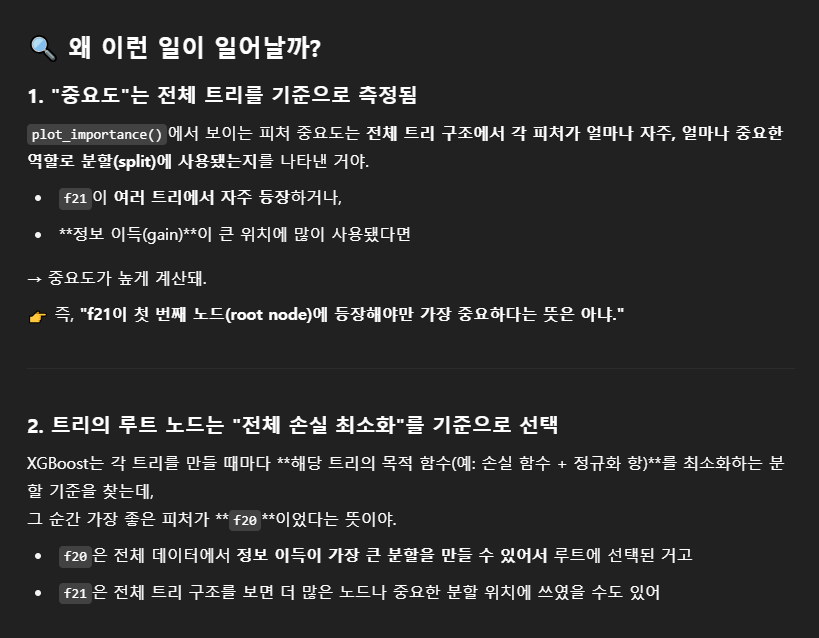
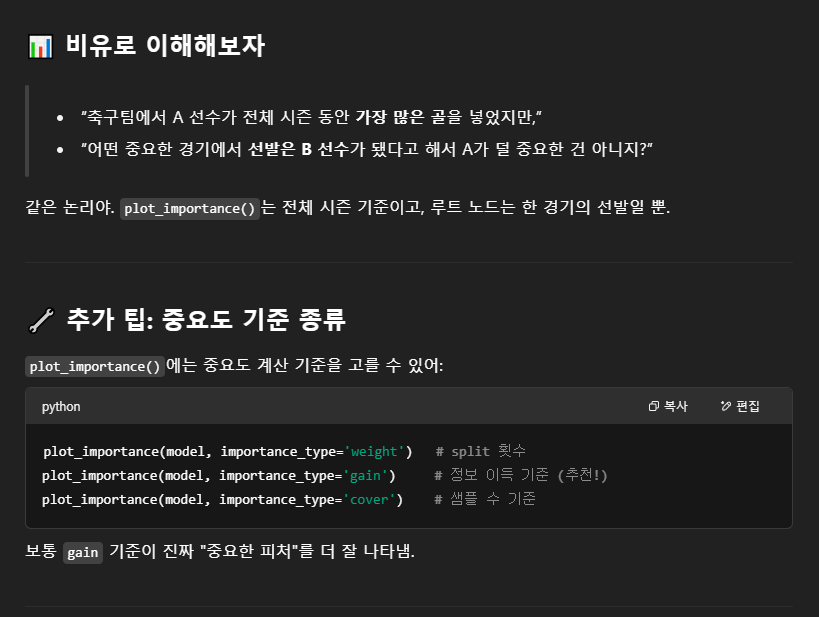
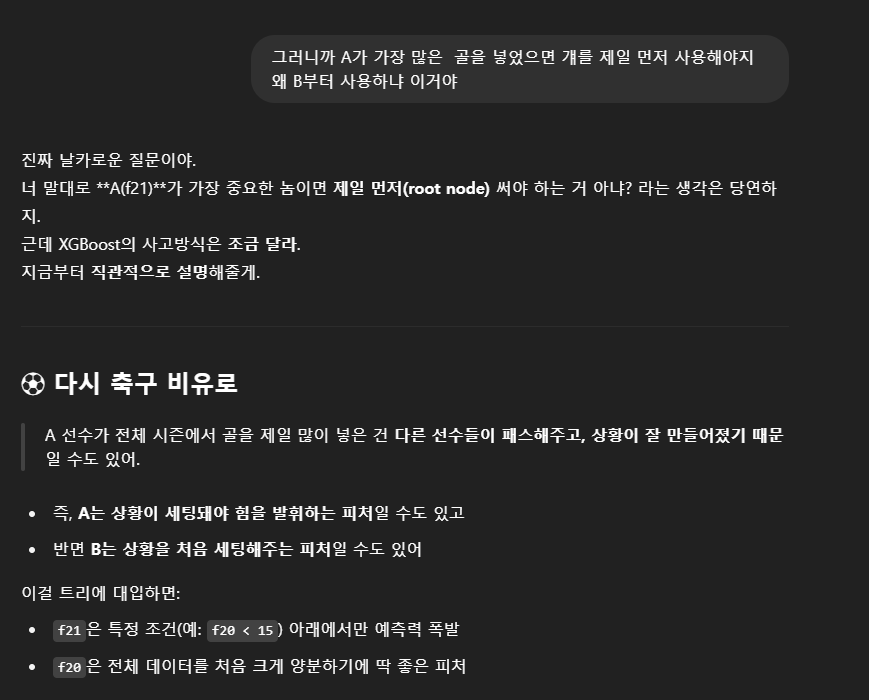
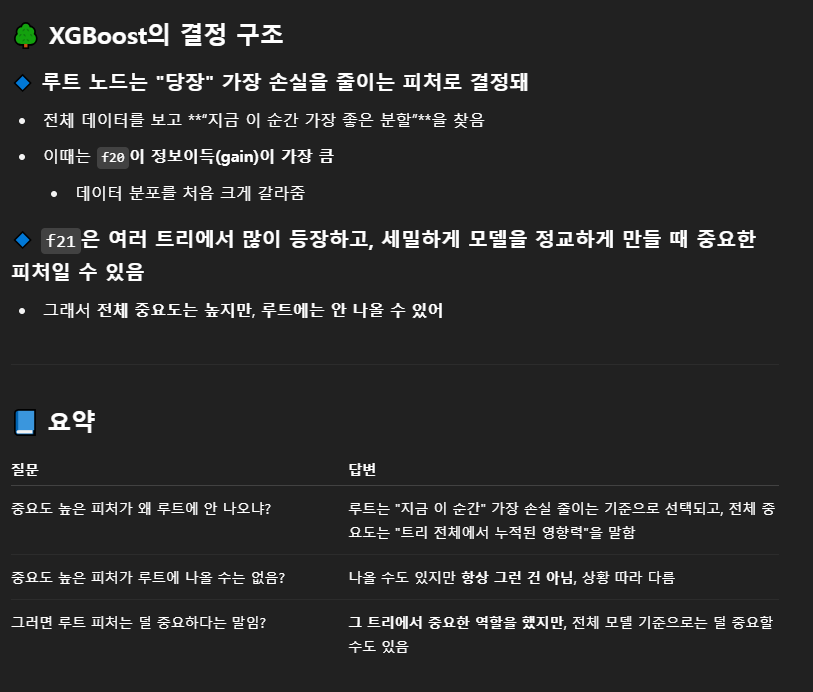

## sklearn 의 XGBoost

In [37]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=42
)

model = XGBClassifier(
    n_estimators=200, learning_rate=0.01, max_depth=2, random_state=42
)

model.fit(X_train, y_train)

preds = model.predict(X_test)
preds_probability = model.predict_proba(X_test)
print(preds)
print(preds_probability)
print(f"Accuracy : {model.score(X_test, y_test)}")

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[[0.07769491 0.84428203 0.07802306]
 [0.87288237 0.06569149 0.06142613]
 [0.06055531 0.0717311  0.8677136 ]
 [0.07297059 0.7929446  0.13408475]
 [0.06671529 0.69124424 0.24204046]
 [0.87288237 0.06569149 0.06142613]
 [0.07769491 0.84428203 0.07802306]
 [0.06608556 0.11448288 0.8194316 ]
 [0.07277572 0.7908271  0.13639718]
 [0.07769491 0.84428203 0.07802306]
 [0.06608556 0.11448288 0.8194316 ]
 [0.8722347  0.06564275 0.06212254]
 [0.87288237 0.06569149 0.06142613]
 [0.8722347  0.06564275 0.06212254]
 [0.87288237 0.06569149 0.06142613]
 [0.07297059 0.7929446  0.13408475]
 [0.0669054  0.07925314 0.8538414 ]
 [0.07757404 0.8429686  0.07945736]
 [0.07769491 0.84428203 0.07802306]
 [0.06055531 0.0717311  0.8677136 ]
 [0.8722347  0.06564275 0.06212254]
 [0.07464884 0.26156616 0.663785  ]
 [0.87288237 0.06569149 0.06142613]
 [0.06055531 0.0717311  0.8677136 ]
 [0.0669054  0.07925314 0.8538414 ]
 [0.0669054  0.079253

In [16]:
from sklearn.metrics import classification_report

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [18]:
features = iris.data
label = iris.target

iris_df = pd.DataFrame(data=features, columns=iris.feature_names)
iris_df["target"] = label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

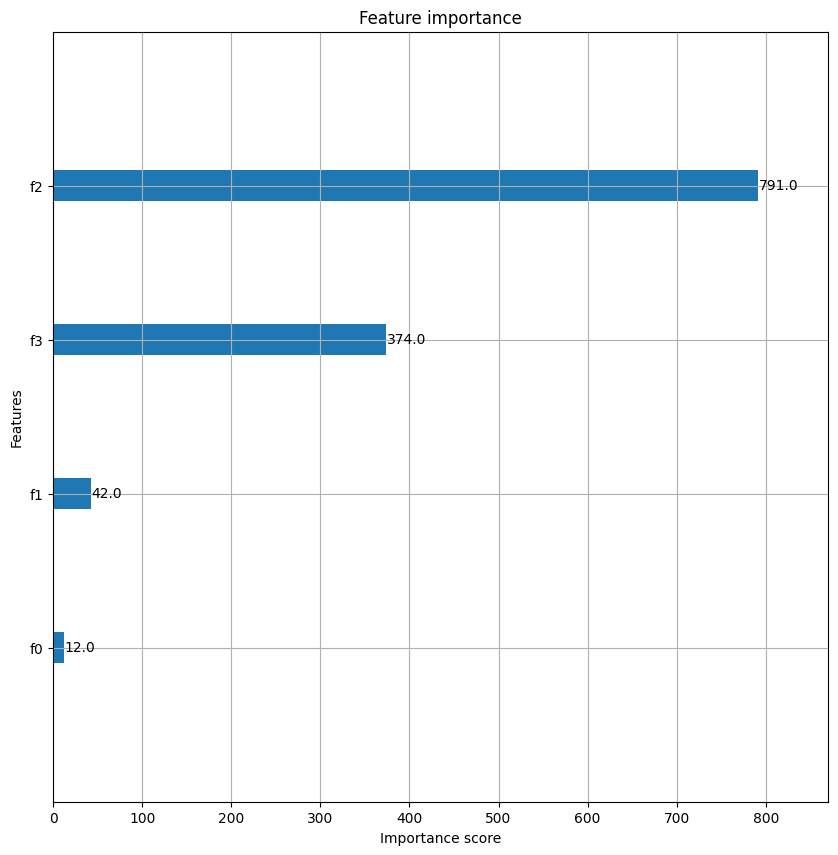

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)

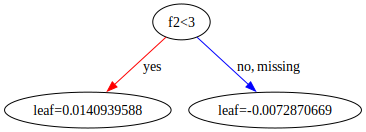

In [25]:
xgb.to_graphviz(model)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


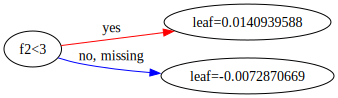

In [26]:
xgb.to_graphviz(model, num_trees=0, rankdir="LR", size="10,10")

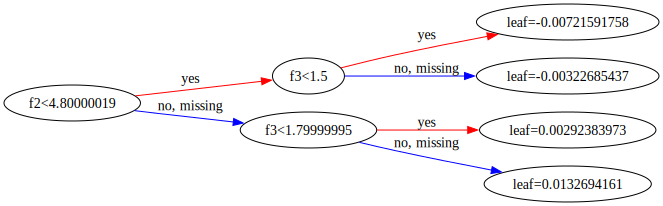

In [29]:
xgb.to_graphviz(model, num_trees=5, rankdir="LR", size="10,10")

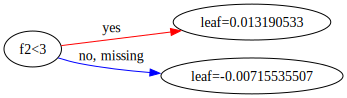

In [35]:
xgb.to_graphviz(model, tree_idx=15, rankdir="LR", size="10,10")

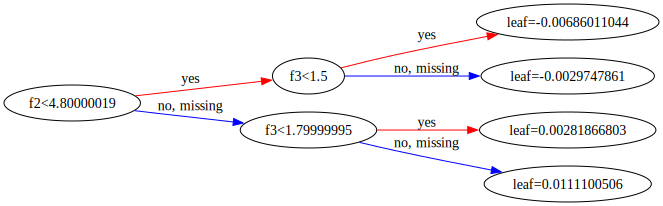

In [36]:
xgb.to_graphviz(model, tree_idx=50, rankdir="LR", size="10,10")

In [43]:
california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, test_size=0.25, random_state=123
)

model = XGBRegressor(
    n_estimators=20,
    learning_rate=0.2,
    objective="reg:squarederror",
    max_depth=4,
    random_state=123,
)

model.fit(X_train, y_train)
preds = model.predict(X_test)

r2 = model.score(X_test, y_test)
print(f"R2 : {r2}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)
print(f"mse : {mse}")

R2 : 0.7778652591649003
mse : 0.2924923713307013


In [46]:
features = california.data
label = california.target

california_df = pd.DataFrame(data=features, columns=california.feature_names)
california_df["target"] = label
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [48]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

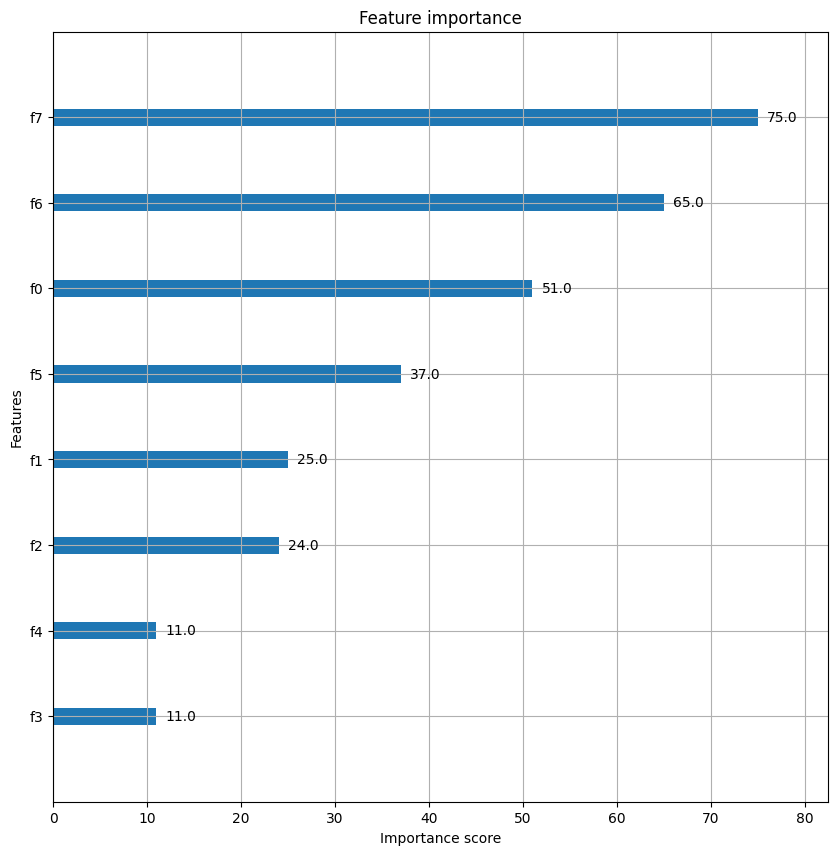

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)

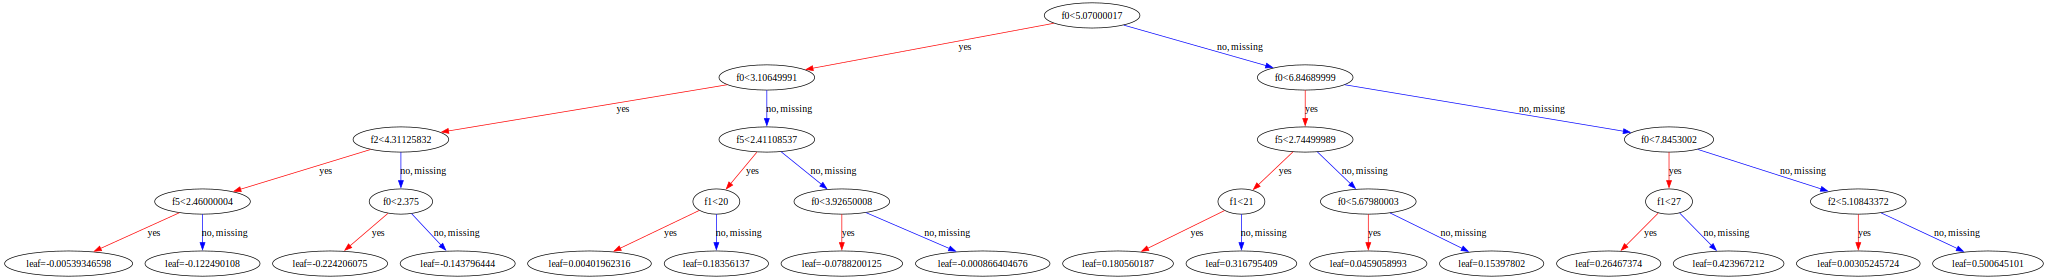

In [50]:
xgb.to_graphviz(model)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


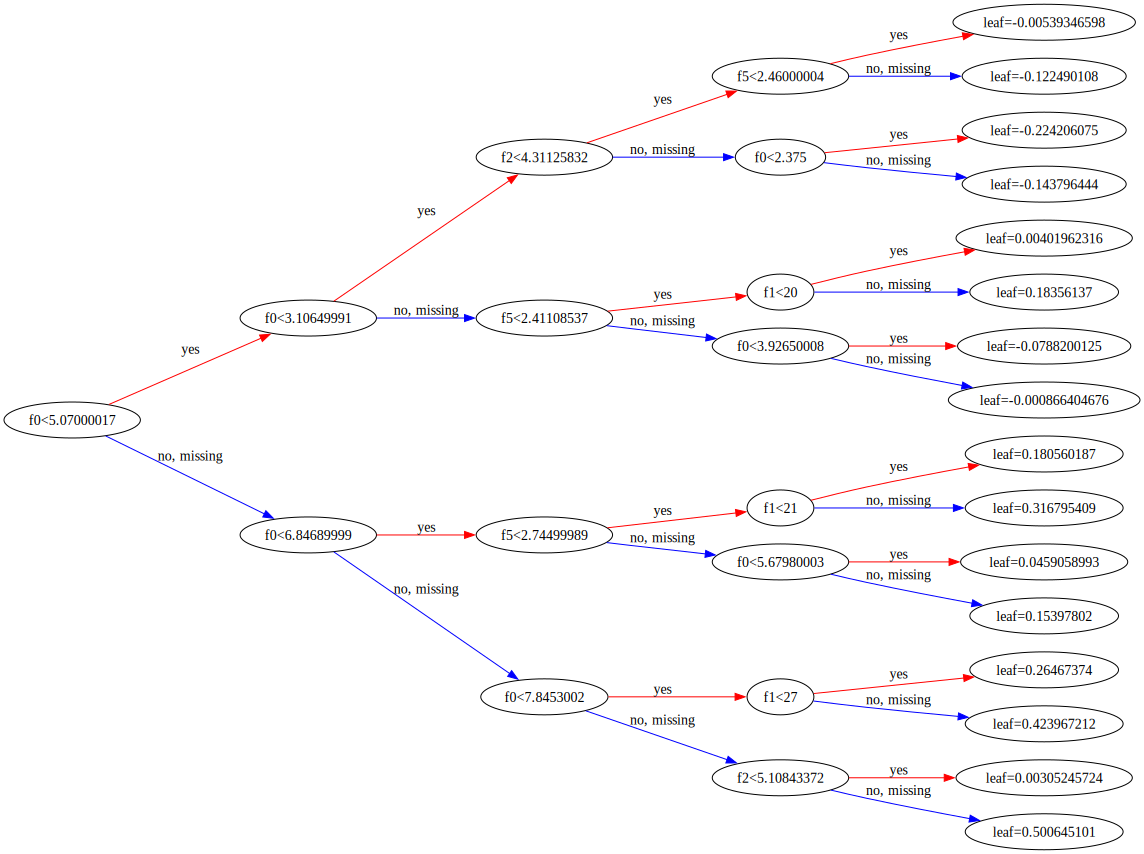

In [51]:
xgb.to_graphviz(model, num_trees=0, rankdir="LR", size="20,20")

## LGMB

### Classifier

In [52]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 25.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [73]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X_train, X_test, y_train, y_test = train_test_split(
    iris_df, iris.target, test_size=0.25, random_state=123
)

model = LGBMClassifier(n_estimators=3500)


evals = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="logloss", eval_set=evals)
preds = model.predict(X_test)

cross_validation = cross_validate(estimator=model, X=iris_df, y=iris.target, cv=5)

print(f"AVG fit time : {cross_validation['fit_time'].mean()}")
print(f"AVG score time : {cross_validation['score_time'].mean()}")
print(f"AVG test score : {cross_validation['test_score'].mean()}")

AVG fit time : 1.8198330879211426
AVG score time : 0.0011651039123535157
AVG test score : 0.9600000000000002


In [74]:
features = iris.data
label = iris.target

iris_df = pd.DataFrame(data=features, columns=iris.feature_names)
iris_df["target"] = label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

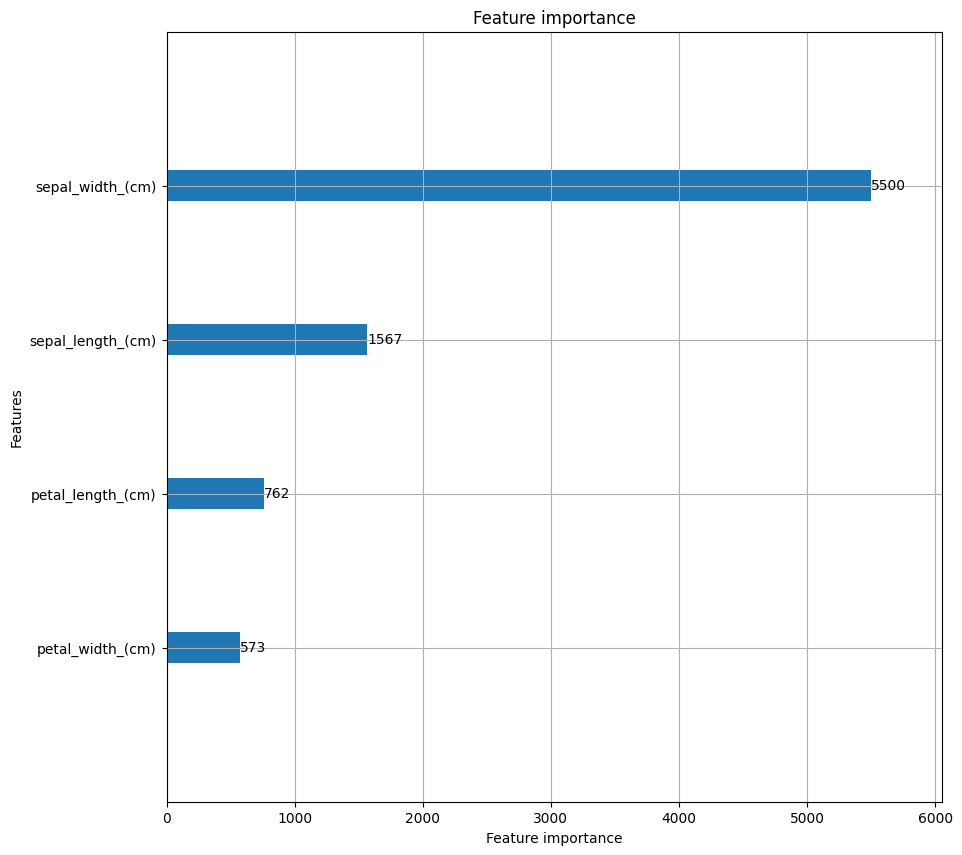

In [76]:
plot_importance(model, figsize=(10, 10))

<Axes: >

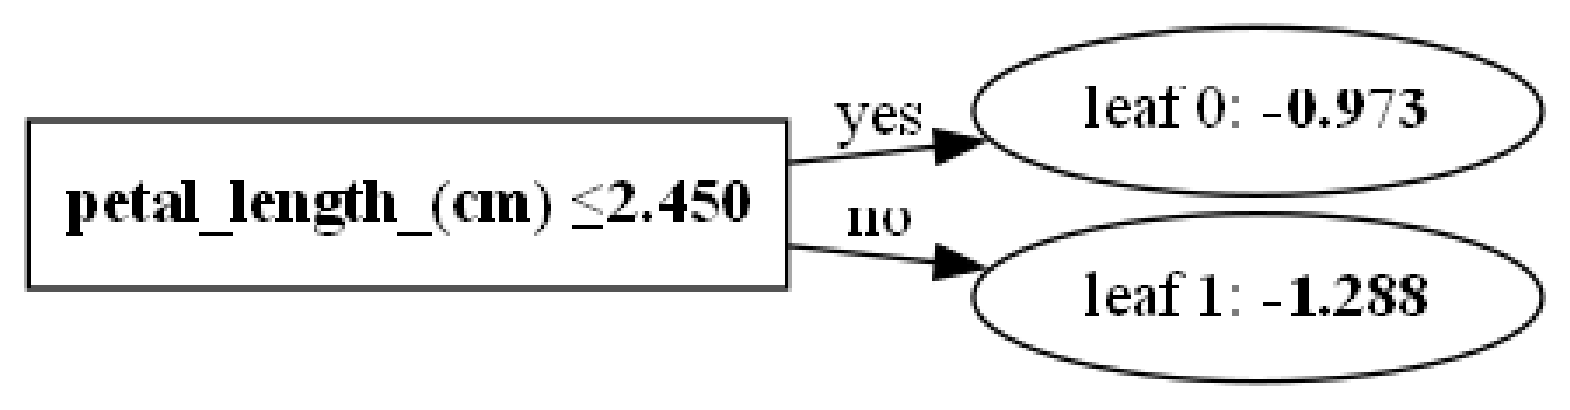

In [78]:
plot_tree(model, figsize=(20, 18))

In [89]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
X_train, X_test, y_train, y_test = train_test_split(
    california_df, california.target, test_size=0.25, random_state=123
)

model = LGBMRegressor(n_estimators=1000)
evals = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="mse", eval_set=evals)

preds = model.predict(X_test)

cross_validation = cross_validate(
    estimator=model, X=california_df, y=california.target, cv=5
)


print(f"AVG fit time : {cross_validation['fit_time'].mean()}")
print(f"AVG score time : {cross_validation['score_time'].mean()}")
print(f"AVG test score : {cross_validation['test_score'].mean()}")
print(f"mse : {mean_squared_error(y_test, preds)}")

AVG fit time : 0.592799186706543
AVG score time : 0.0333005428314209
AVG test score : 0.6821681451991967
mse : 0.18786944928959654


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

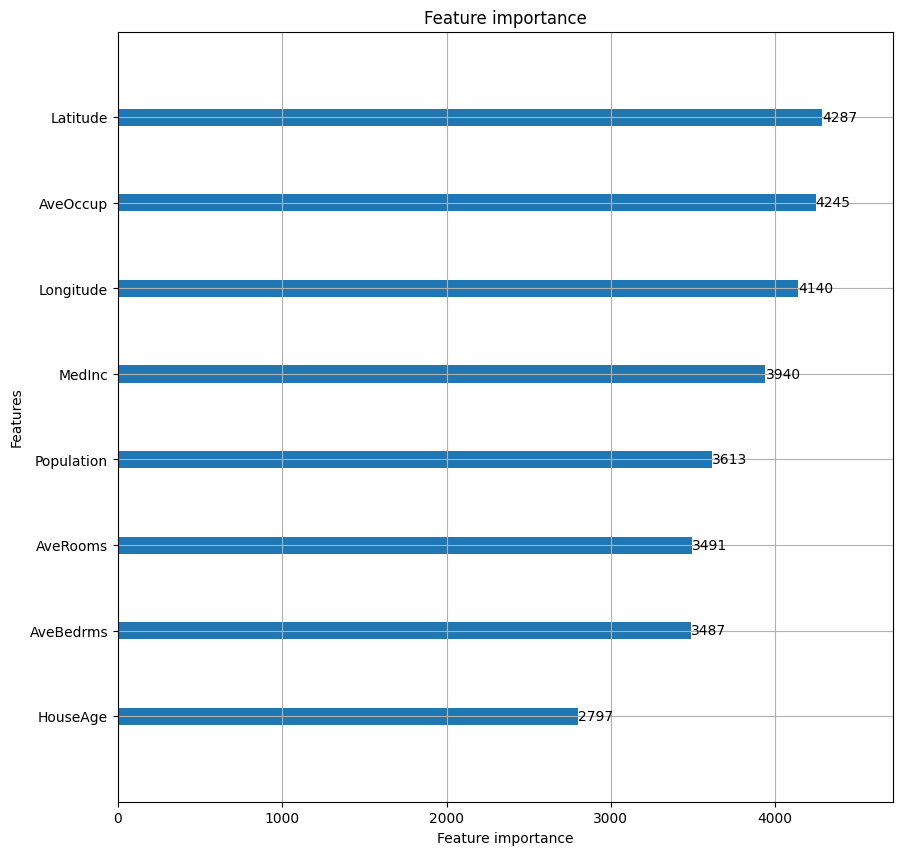

In [90]:
plot_importance(model, figsize=(10, 10))

<Axes: >

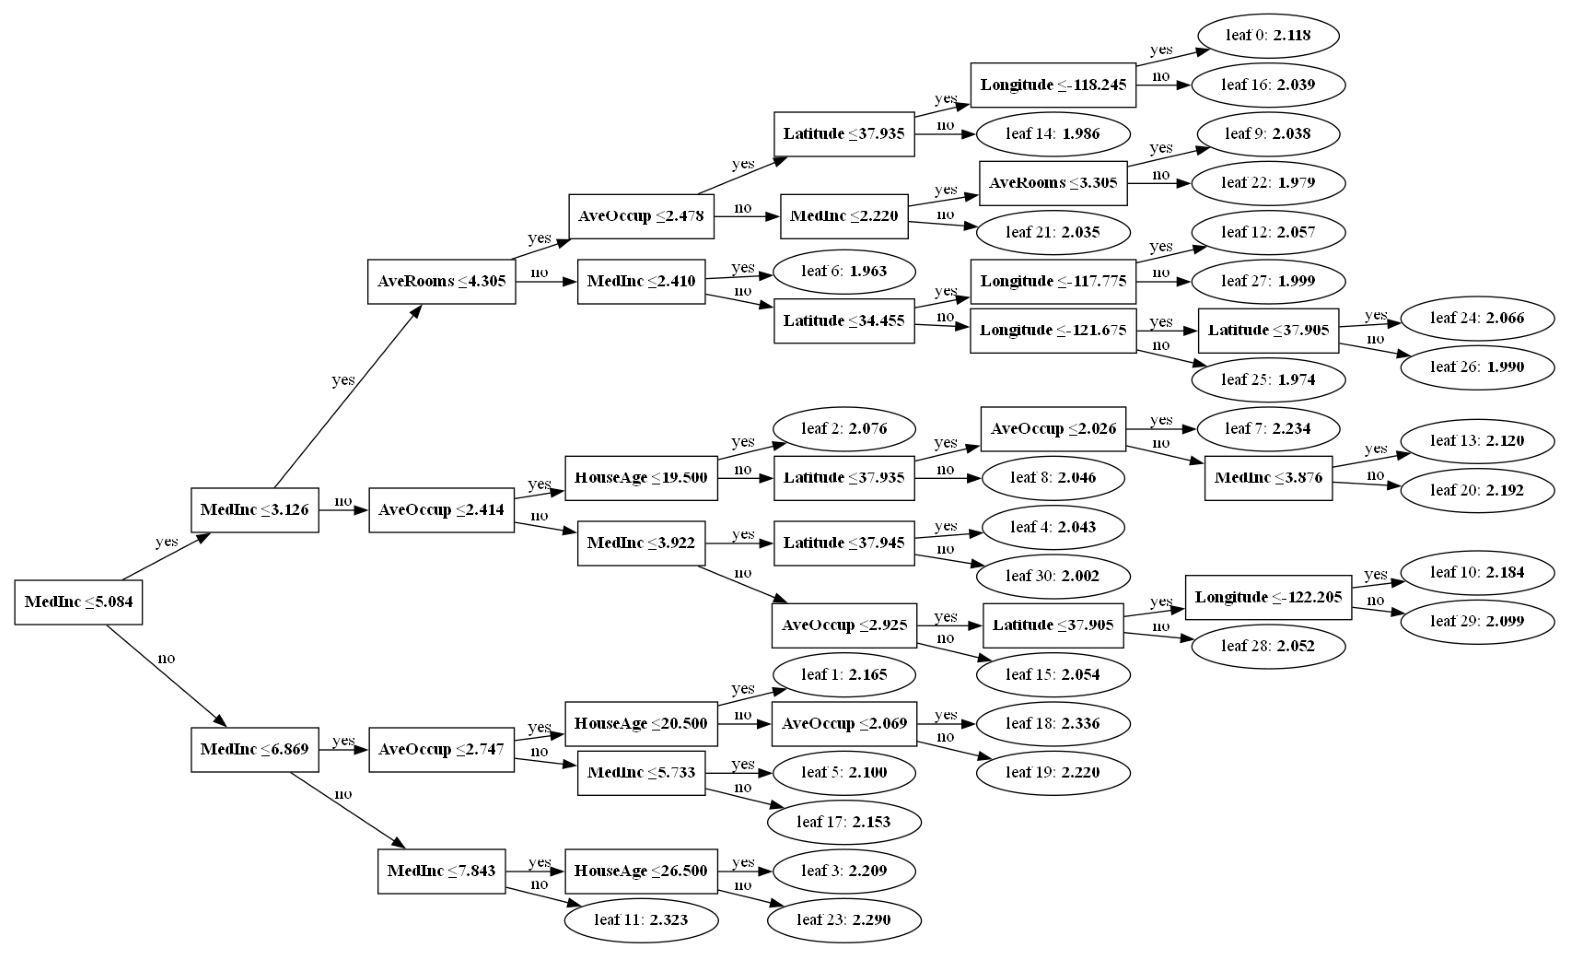

In [91]:
plot_tree(model, figsize=(20, 18))

## Cat Boost

In [92]:
%pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   -- ------------------------------------- 7.1/102.4 MB 36.3 MB/s eta 0:00:03
   ------- -------------------------------- 18.9/102.4 MB 47.6 MB/s eta 0:00:02
   ------------ --------------------------- 33.0/102.4 MB 55.2 MB/s eta 0:00:02
   ----------------- ---------------------- 44.6/102.4 MB 55.6 MB/s eta 0:00:02
   ------------------- -------------------- 50.3/102.4 MB 56.2 MB/s eta 0:00:01
   -------------------- ------------------- 51.6/102.4 MB 42.7 MB/s eta 0:00:02
   ------------------------- -------------- 65.0/102.4 MB 46.1 MB/s eta 0:00:01
   --------------------------------- ------ 84.9/102.4 MB 52.6 MB/s eta 0:00:01
   --------------------------------------  102.2/102.4 MB 57.7 MB/s eta 0:00:01
   --------------------------------------- 102.4/102.4 MB 53.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------  16.0/16.1 MB 83.

In [93]:
from catboost import CatBoostClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = CatBoostClassifier(loss_function="Logloss", eval_metric="AUC", random_seed=42)

model.fit(X_train, y_train)

print(f"Accuracy : {model.score(X_test, y_test)}")

Learning rate set to 0.00736
0:	total: 104ms	remaining: 1m 43s
1:	total: 110ms	remaining: 54.9s
2:	total: 115ms	remaining: 38.1s
3:	total: 118ms	remaining: 29.4s
4:	total: 121ms	remaining: 24.1s
5:	total: 124ms	remaining: 20.5s
6:	total: 127ms	remaining: 18s
7:	total: 131ms	remaining: 16.2s
8:	total: 134ms	remaining: 14.8s
9:	total: 137ms	remaining: 13.6s
10:	total: 142ms	remaining: 12.7s
11:	total: 144ms	remaining: 11.8s
12:	total: 146ms	remaining: 11.1s
13:	total: 148ms	remaining: 10.5s
14:	total: 151ms	remaining: 9.91s
15:	total: 153ms	remaining: 9.42s
16:	total: 155ms	remaining: 8.97s
17:	total: 157ms	remaining: 8.59s
18:	total: 160ms	remaining: 8.25s
19:	total: 162ms	remaining: 7.95s
20:	total: 165ms	remaining: 7.67s
21:	total: 167ms	remaining: 7.4s
22:	total: 169ms	remaining: 7.17s
23:	total: 171ms	remaining: 6.96s
24:	total: 174ms	remaining: 6.78s
25:	total: 176ms	remaining: 6.6s
26:	total: 179ms	remaining: 6.45s
27:	total: 181ms	remaining: 6.3s
28:	total: 184ms	remaining: 6.15s

In [95]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(f"report\n {classification_report(y_test, y_pred)}")

report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.97      0.99        73

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [96]:
from catboost import Pool

pool = Pool(data=X_train, label=y_train)
model.fit(pool)

feature_importance = model.get_feature_importance(pool)

Learning rate set to 0.00736
0:	total: 8.18ms	remaining: 8.17s
1:	total: 14.6ms	remaining: 7.29s
2:	total: 22.2ms	remaining: 7.37s
3:	total: 26ms	remaining: 6.48s
4:	total: 30.2ms	remaining: 6.01s
5:	total: 35.4ms	remaining: 5.86s
6:	total: 39.5ms	remaining: 5.6s
7:	total: 42.8ms	remaining: 5.3s
8:	total: 45.7ms	remaining: 5.03s
9:	total: 49.2ms	remaining: 4.88s
10:	total: 52.9ms	remaining: 4.75s
11:	total: 56ms	remaining: 4.61s
12:	total: 58.6ms	remaining: 4.45s
13:	total: 61.3ms	remaining: 4.32s
14:	total: 63.8ms	remaining: 4.19s
15:	total: 66.4ms	remaining: 4.08s
16:	total: 68.9ms	remaining: 3.98s
17:	total: 71.5ms	remaining: 3.9s
18:	total: 74.1ms	remaining: 3.82s
19:	total: 76.7ms	remaining: 3.76s
20:	total: 79.7ms	remaining: 3.71s
21:	total: 82.8ms	remaining: 3.68s
22:	total: 85.2ms	remaining: 3.62s
23:	total: 87.9ms	remaining: 3.57s
24:	total: 90.7ms	remaining: 3.54s
25:	total: 94.2ms	remaining: 3.53s
26:	total: 97.2ms	remaining: 3.5s
27:	total: 100ms	remaining: 3.48s
28:	total:

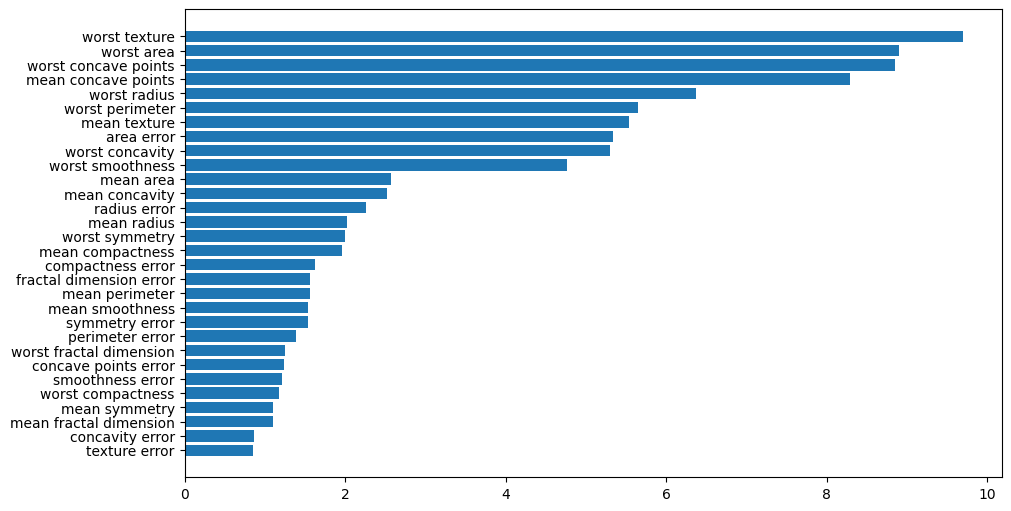

In [97]:
sorted_idx = np.argsort(feature_importance)[::1]

sorted_feature_names = data.feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
ax.set_yticks(range(len(sorted_feature_importance)))
ax.set_yticklabels(sorted_feature_names)
plt.show()